(0, 0.6)

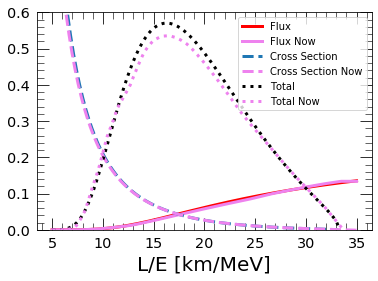

In [42]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("../Contour/Style/Paper.mplstyle")

BaseLine = 60 #km
def PhiEnu(L_over_E):
    E = BaseLine / L_over_E
    phi = 0.58*np.exp(0.87-0.16*E-0.091*E**2) + 0.30*np.exp(0.896-0.239*E-0.0981*E**2) + 0.07*np.exp(0.976-0.162*E-0.0790*E**2) +  0.05*np.exp(0.793 - 0.08*E - 0.1085*E**2)
    return phi

def Xsec(L_over_E):
    Enu = BaseLine / L_over_E
    DeltaMnp = 939.56542052-938.27208816
    Me = 0.51099895
    Ee = Enu-DeltaMnp
    Pe = np.sqrt(Ee**2-Me**2)
    sigma = 0.0952 * Ee * Pe
    return sigma

# HMFlux=np.load("HMflux.npz")
import ROOT
ff_input = ROOT.TFile.Open("JUNOInputs2020_10_29.root","READ")
HuberMuellerFlux_DYBbumpFixed = ff_input.Get("HuberMuellerFlux_DYBbumpFixed")
Enu_data = np.linspace(1.7,20,200)
Flux_data = Enu_data.copy()
i = 0
for E in Enu_data:
    Flux_data[i] = HuberMuellerFlux_DYBbumpFixed.Interpolate(E)
    i += 1
from scipy import interpolate
# print(Flux_data)
funcFlux = interpolate.interp1d(Enu_data,Flux_data,kind='slinear')
def GetFluxNow(L_over_E):
    Enu = BaseLine / L_over_E
    return funcFlux(Enu)
IBDXsec_StrumiaVissani = ff_input.Get("IBDXsec_StrumiaVissani")
Xsec_data = Enu_data.copy()
i = 0
for E in Enu_data:
    Xsec_data[i] = IBDXsec_StrumiaVissani.Eval(E)*1e42
    i += 1
funcXsec = interpolate.interp1d(Enu_data,Xsec_data,kind='slinear')
def GetXsecNow(L_over_E):
    Enu = BaseLine / L_over_E
    return funcXsec(Enu)

def Pe2e(L_over_E):
    sinsq213=0.1
    sinsq12=0.32
    dmsq21=7.6e-5
    dmsq32=2.4e-3
    P21 = 

def No_Oscillation(L_over_E):
    return PhiEnu(L_over_E)*Xsec(L_over_E)


fig,ax=plt.subplots()
L_over_E = np.linspace(5,35,200)
plt.plot(L_over_E,0.1*PhiEnu(L_over_E),label="Flux",color='red')
plt.plot(L_over_E,0.1*GetFluxNow(L_over_E),label="Flux Now",color='violet')
plt.plot(L_over_E,0.1*Xsec(L_over_E),label="Cross Section",linestyle='--')
plt.plot(L_over_E,0.1*GetXsecNow(L_over_E),label="Cross Section Now",color='violet', linestyle='--')
plt.plot(L_over_E,3*Xsec(L_over_E)*PhiEnu(L_over_E),label="Total",linestyle=':',color='black')
plt.plot(L_over_E,3*GetXsecNow(L_over_E)*GetFluxNow(L_over_E),label="Total Now",linestyle=':',color='violet')
ax.set_xlabel("L/E [km/MeV]")
# ax.set_ylabel("$\\times 10^{-42} [cm^{2}]$")
plt.legend(loc="best")
plt.ylim(0,0.6)


[1.33806660e+00 1.33380047e+00 1.32954800e+00 ... 4.98579517e-09
 4.94802810e-09 4.91054939e-09]
